/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

显示原图 1


/usr/local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

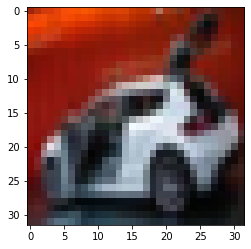

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle
import random

# 设置随机种子
random.seed(1)


def load_CIFAR_batch(filename):
    with open(filename,'rb')as f:
        data_dict = pickle.load(f,encoding='bytes')
        images = data_dict[b'data']
        labels = data_dict[b'labels']
        
        #把元数据结构调整为：BCWH
        images = images.reshape(10000,3,32,32)
        #tesorflow 处理图像数据的结构为：BWHC
        #把通道数据c移动到最后一个维度
        images = images.transpose(0,2,3,1)
        labels = np.array(labels)
        return images,labels
test_image,test_label = load_CIFAR_batch('/root/.ipython/profile_nbserver/code/cifar10-CNN-master/cifar10_data/cifar-10-batches-py/test_batch')
print('显示原图',test_label[6])
plt.imshow(test_image[6])

In [2]:
import os
def load_CIFAR_data(data_dir):
    images_train = []
    labels_train = []


    for i in range(5):
        # 循环读取，每一个文件的数据和标签名
        f = os.path.join(data_dir,'data_batch_%d'%(i+1))
        print('loading',f)
        image_batch,label_batch=load_CIFAR_batch(f)
        images_train.append(image_batch)
        labels_train.append(label_batch)
        Xtrain=np.concatenate(images_train)
        Ytrain=np.concatenate(labels_train)
        del image_batch,label_batch
    Xtest,Ytest = load_CIFAR_batch(os.path.join(data_dir,'test_batch'))
    print("finished loadding CIFAR-10 data")
    return Xtrain,Ytrain,Xtest,Ytest
data_dir = '/root/.ipython/profile_nbserver/code/cifar10-CNN-master/cifar10_data/cifar-10-batches-py/'

Xtrain,Ytrain,Xtest,Ytest = load_CIFAR_data(data_dir)


loading /root/.ipython/profile_nbserver/code/cifar10-CNN-master/cifar10_data/cifar-10-batches-py/data_batch_1
loading /root/.ipython/profile_nbserver/code/cifar10-CNN-master/cifar10_data/cifar-10-batches-py/data_batch_2
loading /root/.ipython/profile_nbserver/code/cifar10-CNN-master/cifar10_data/cifar-10-batches-py/data_batch_3
loading /root/.ipython/profile_nbserver/code/cifar10-CNN-master/cifar10_data/cifar-10-batches-py/data_batch_4
loading /root/.ipython/profile_nbserver/code/cifar10-CNN-master/cifar10_data/cifar-10-batches-py/data_batch_5
finished loadding CIFAR-10 data


In [3]:
print('training data shape:',Xtrain.shape)
print('training labels shape:',Ytrain.shape)
print('test data shape:',Xtest.shape)
print('test labels shape:',Ytest.shape)

training data shape: (50000, 32, 32, 3)
training labels shape: (50000,)
test data shape: (10000, 32, 32, 3)
test labels shape: (10000,)


2


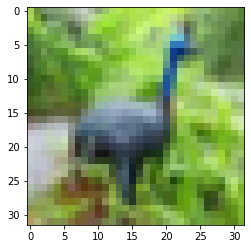

In [4]:
%matplotlib inline
plt.imshow(Xtrain[6])
print(Ytrain[6])

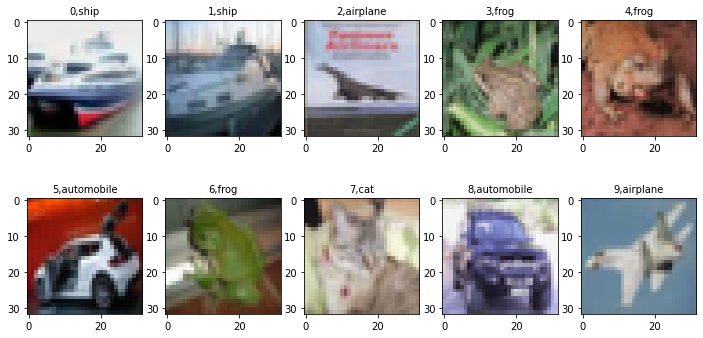

In [5]:
label_dict = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}
#定义显示图像数据以及对应标签的函数
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,6)
    if num > 10:
        num=10
    for i in range(0,num):
        ax=plt.subplot(2,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        
        title = str(i)+','+label_dict[labels[idx]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[idx]]
        ax.set_title(title,fontsize=10)
        idx+=1
    plt.show()
    
plot_images_labels_prediction(Xtest,Ytest,[],1,10)

In [6]:
Xtrain[0][0][0]
print(Xtrain[0][0][0])
Xtrain_normalize = Xtrain.astype('float32')/255.0
Xtest_normalize = Xtest.astype('float32')/255.0
Xtrain_normalize[0][0][0]
# print(Xtrain_normalize[0][0][0])

[59 62 63]


array([0.23137255, 0.24313726, 0.24705882], dtype=float32)

In [7]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
yy = [[0],[1],[2],[3],[4],[5],[6],[7],[8],[9]]
encoder.fit(yy)
Ytrain_reshape = Ytrain.reshape(-1,1)
Ytrain_onehot = encoder.transform(Ytrain_reshape)
Ytest_reshape = Ytest.reshape(-1,1)
Ytest_onehot = encoder.transform(Ytest_reshape)

In [8]:
def weight(shape):
    return tf.Variable(tf.truncated_normal(shape,stddev=0.1),name='W')
def bias(shape):
    return tf.Variable(tf.constant(0.1,shape=shape),name='b')
def conv2d(x,W):
    return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='SAME')
def max_pool_2x2(x):
    return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

In [9]:
with tf.name_scope('input_layer'):
    x = tf.placeholder('float',shape=[None,32,32,3],name='x')
with tf.name_scope('conv_1'):
    W1 = weight([3,3,3,32])
    b1 = bias([32])
    conv_1 = conv2d(x,W1)+b1
    conv_1 = tf.nn.relu(conv_1)
    
with tf.name_scope('pool_1'):
    pool_1 = max_pool_2x2(conv_1)
    
# with tf.name_scope('conv_2'):
#     W2 = weight([3,3,32,64])
#     b2 = bias([64])
#     conv_2=conv2d(pool_1,W2)+b2
#     conv_2=tf.nn.relu(conv_2)
    
# with tf.name_scope('pool_2'):
#     pool_2 = max_pool_2x2(conv_2)
    
with tf.name_scope('fc'):
    W3 = weight([8192,256])
    b3 = bias([256])
    flat = tf.reshape(pool_1,[-1,8192])
    h= tf.nn.relu(tf.matmul(flat,W3)+b3)
    h_dropout = tf.nn.dropout(h,keep_prob=0.8)
with tf.name_scope('output_layter'):
    W4 = weight([256,10])
    b4 = bias([10])
    pred = tf.nn.softmax(tf.matmul(h_dropout,W4)+b4,name='pred')

with tf.name_scope('optimizer'):
    y = tf.placeholder('float',shape=[None,10],name='label')
    loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
        logits=pred,labels=y))
    optimizer = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(loss_function)
    

with tf.name_scope('evaluation'):
    correct_prediction = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,'float'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [10]:
from time import time
train_epochs = 100
batch_size = 50
total_batch = int(len(Xtrain)/batch_size)
epoch_list=[]
accuracy_list=[]
loss_list = []
epoch = tf.Variable(0,name='epoch',trainable=False)
startTime = time()
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [11]:
#断点续训
ckpt_dir = '/root/.ipython/profile_nbserver/cash_file/CIFAR10_cnn1'
if not os.path.exists(ckpt_dir):
    os.makedirs(ckpt_dir)
saver = tf.train.Saver(max_to_keep=1)

#如果有检查点文件 ，读取最新的检查点文件，恢复各种变量值
ckpt = tf.train.latest_checkpoint(ckpt_dir)
if ckpt != None:
    saver.restore(sess,ckpt)#加载所有的参数
    
else:
    print('training from scratch.')

#获取续训参数
start = sess.run(epoch)
print('training starts from {} epoch.'.format(start+1))

#迭代训练
def get_train_batch(number,batch_size):
    return Xtrain_normalize[number*batch_size:(number+1)*batch_size],\
Ytrain_onehot[number*batch_size:(number+1)*batch_size]


for ep in range(start,train_epochs):
    for i in range(total_batch):
        batch_x,batch_y = get_train_batch(i,batch_size)
        sess.run(optimizer,feed_dict={x:batch_x,y:batch_y})
        
        if i % 100 ==0:
            print('Step{}'.format(i),'finished')
            
    loss,acc = sess.run([loss_function,accuracy],feed_dict={x:batch_x,y:batch_y})
    epoch_list.append(ep+1)
    loss_list.append(loss)
    accuracy_list.append(acc)
    print("train epoch:",'%02d'%(sess.run(epoch)+1),\
         'loss=','{:.6f}'.format(loss),'accuracy=',acc)
    saver.save(sess,'/root/.ipython/profile_nbserver/cash_file/CIFAR10_cnn1/cifar10_model.ckpt',global_step=ep+1)
    sess.run(epoch.assign(ep+1))
    
duration = time()-startTime
print('train finished takes:',duration)

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /root/.ipython/profile_nbserver/cash_file/CIFAR10_cnn1/cifar10_model.ckpt-99
training starts from 99 epoch.
Step0 finished
Step100 finished
Step200 finished
Step300 finished
Step400 finished
Step500 finished
Step600 finished
Step700 finished
Step800 finished
Step900 finished
train epoch: 99 loss= 1.704528 accuracy= 0.76
Step0 finished
Step100 finished
Step200 finished
Step300 finished
Step400 finished
Step500 finished
Step600 finished
Step700 finished
Step800 finished
Step900 finished
train epoch: 100 loss= 1.688363 accuracy= 0.78
Instructions for updating:
Use standard file APIs to delete files with this prefix.
train finished takes: 91.8129346370697


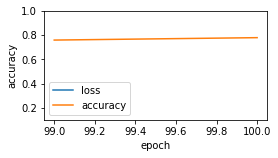

In [12]:
#可视化损失
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.plot(epoch_list,loss_list,label='loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'],loc='upper right')


#可视化准确率
plt.plot(epoch_list,accuracy_list,label='accuracy')
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.ylim(0.1,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()


test accuracy:0.663100
[3 8 8 8 6 6 1 6 3 1]


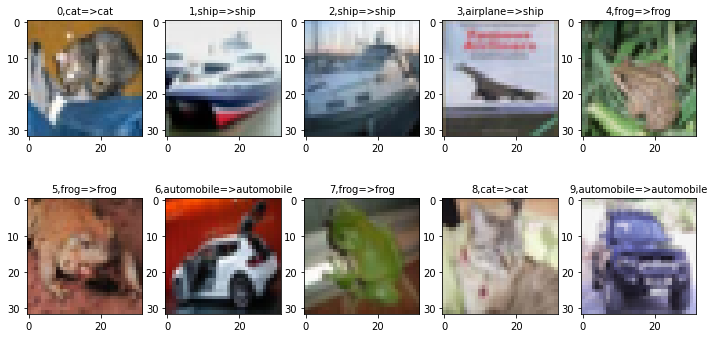

In [13]:
test_total_batch = int(len(Xtest_normalize)/batch_size)
test_acc_sum = 0.0
for i in range(test_total_batch):
    test_image_batch = Xtest_normalize[i*batch_size:(i+1)*batch_size]
    test_label_batch = Ytest_onehot[i*batch_size:(i+1)*batch_size]
    test_batch_acc = sess.run(accuracy,feed_dict= {x:test_image_batch,y:test_label_batch})
    test_acc_sum += test_batch_acc
test_acc = float(test_acc_sum/test_total_batch)
print('test accuracy:{:.6f}'.format(test_acc))


test_pred = sess.run(pred,feed_dict={x:Xtest_normalize[:10]})
prediction_result =sess.run(tf.argmax(test_pred,1))
print(prediction_result)


plot_images_labels_prediction(Xtest,Ytest,prediction_result,0,10)


In [14]:

def predict(sess,inputs):
#     preds = sess.run('pred:0', feed_dict={'X:0': inputs}) 
    test_pred = sess.run(pred,feed_dict={x:inputs[:50]})
    #部署clipper时用这种写法
#     test_pred = sess.run('pred:0',feed_dict={'x:0':inputs[:50]})

    prediction_result =sess.run(tf.argmax(test_pred,1))
    # `X` is used, it must be defined in the model with that name explicitly!
    return prediction_result
predict(sess,Xtest_normalize)

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 3, 7, 9, 8, 5, 7, 8, 6, 7, 0,
       4, 9, 4, 6, 4, 0, 9, 6, 3, 4, 2, 5, 9, 1, 4, 9, 9, 5, 0, 6, 5, 6,
       0, 9, 5, 9, 7, 4])

InvalidArgumentError: logits and labels must be broadcastable: logits_size=[400,10] labels_size=[50,10]  维度报错  ？？？？？？